In [212]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience


In [213]:
#DB-Connection
driver = '{ODBC Driver 17 for SQL Server}' # This might be a different version on your system
server = 'ANNINAYOGA\SQLEXPRESS'
database = 'Immo'
username = 'immoadmin'
password = 'zhaw$1234'
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

In [214]:
#Connection and SQL-Query for table property
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM property"
df_property = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

#Connection and SQL-Query for table location
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM location"
df_location = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

# Performing a inner join on the two DataFrames to filter data which do not exist on location due to connection issues
df_filtered_property_location = pd.merge(df_property, df_location,on='LocationId', how='inner')


In [215]:
#Print dimensions of the three dataframes 
print(df_filtered_property_location.shape)
print(df_location.shape)
print(df_merged.shape)

(11295, 20)
(11295, 5)
(11295, 20)


# Data Cleansing for Location-Property

In [216]:
#Show head of df df_filtered_property_location
df_filtered_property_location.head()

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,NetPrice,LocationId,PropertyAdditionalFeaturesId,PropertyDescription,Vendor,Canton,Street,ZIP,longitude,latitude
0,4000339592,2024-03-26 20:51:38,2.5,93.0,1,Sofort,Wohnung,2020-01-01,1920.0,NaN,1920.0,8410960a-1d36-40e9-940c-045cb7ea0657,65f95f08-2ad6-46aa-88a8-3d60b251686d,"La Residenza Delta si trova a Capolago, situat...",Interfida SA,ti,Via Carlo Maderno 62,6825,None,None
1,4000280848,2024-03-26 20:51:50,2.5,62.0,2,Sofort,Wohnung,2017-01-01,1730.0,280.0,1450.0,fe87a1a0-0607-4532-91f9-9b52325d901c,47fb2685-0d55-4201-b7b2-65c7c4797f7a,"La Residenza Martina, progettata dall’Architet...",Tarchini Group,ti,Via Indipendenza 10b,6826,None,None
2,4000653378,2024-03-26 21:52:37,2.0,58.0,3,Nach Vereinbarung,Wohnung,None,910.0,160.0,750.0,c1e83bdc-405d-41b3-9836-92ecd15a3138,8cff0e4e-2acb-4d04-906b-d76a6ca54d17,Affittasi 2 locali grazioso e luminoso in un q...,Livit AG,ti,Via Cereghetti 8,6834,None,None
3,4000381531,2024-03-26 22:44:33,1.5,40.0,None,Sofort,Wohnung,None,1350.0,100.0,1250.0,eaf7aae5-0fd2-4063-ab10-1ef432b1fe71,b8b96c50-b41f-489a-a908-0ef31a44f60d,"Siamo a Pazzallo, a circa 10 minuti dal centro...",Rusca Studio Immobiliare,ti,None,6912,None,None
4,4000263143,2024-03-26 20:52:41,2.5,50.0,99,Nach Vereinbarung,Wohnung,None,1300.0,NaN,1300.0,c9939627-0caf-4c2e-b11a-aee3bc6afad5,9b110e2e-24c6-4920-a41b-c46378f2e346,A Bissone affittiamo appartamento arredato di ...,Zenit Real Estate Sagl,ti,Via Campione 65,6816,None,None


In [217]:
#Show info of df df_filtered_property_location. Total of 11295 entries
df_filtered_property_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11295 entries, 0 to 11294
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ListingId                     11295 non-null  object        
 1   Timestamp                     11295 non-null  datetime64[ns]
 2   Rooms                         10896 non-null  float64       
 3   SquareMeter                   9296 non-null   float64       
 4   Floor                         9578 non-null   object        
 5   Availability                  11294 non-null  object        
 6   ObjectType                    11294 non-null  object        
 7   YearBuilt                     4969 non-null   object        
 8   Price                         11295 non-null  float64       
 9   AdditionalCost                9270 non-null   float64       
 10  NetPrice                      10055 non-null  float64       
 11  LocationId                  

In [238]:
#Check for duplicates - no duplicates found
df_filtered_property_location.duplicated().sum()

0

# Check for empty entries and filter records

In [230]:
#dataframe df_filtered_property_location_clean  
#ObjectType where Einzelzimmer, Estrichabteil, Hobbyraum, Kellerabteil - filtered
#Rooms where NULL - filtered
#SquareMeter where NULL - filtered
#total: 9024 entries (original: 11295 entries)

In [239]:
# filter out records with empty strings in the 'Rooms' column - new dataframe: df_filtered_property_location_clean
df_filtered_property_location_clean = df_filtered_property_location[df_filtered_property_location['Rooms'].notna()]

In [240]:
#Check ObjectTypes
df_filtered_property_location.groupby("ObjectType").size()

ObjectType
Attikawohnung             318
Bauernhaus                  6
Chalet                     40
Dachwohnung               300
Doppeleinfamilienhaus      28
Einfamilienhaus           281
Einliegerwohnung            9
Einzelzimmer               98
Estrichabteil               2
Hobbyraum                 122
Kellerabteil               11
Loft                       71
Maisonette / Duplex       359
Mansarde                    1
Mehrfamilienhaus            2
Reihenfamilienhaus         58
Studio                    151
Terrassenhaus               4
Terrassenwohnung           38
Villa                      66
Wohnung                  9329
dtype: int64

In [291]:
#Filter where ObjectType != Einzelzimmer, Estrichabteil, Hobbyraum or Kellerabteil
df_filtered_property_location_clean = df_filtered_property_location[(df_filtered_property_location['ObjectType'] != 'Einzelzimmer') & (df_filtered_property_location['ObjectType'] != 'Estrichabteil') & (df_filtered_property_location['ObjectType'] != 'Hobbyraum') & (df_filtered_property_location['ObjectType'] != 'Kellerabteil')]

#Check ObjectTypes - Einzelzimmer, Estrichabteil, Hobbyraum or Kellerabteil are filtered
df_filtered_property_location_clean.groupby("ObjectType").size()

ObjectType
Attikawohnung             318
Bauernhaus                  6
Chalet                     40
Dachwohnung               300
Doppeleinfamilienhaus      28
Einfamilienhaus           281
Einliegerwohnung            9
Loft                       71
Maisonette / Duplex       359
Mansarde                    1
Mehrfamilienhaus            2
Reihenfamilienhaus         58
Studio                    151
Terrassenhaus               4
Terrassenwohnung           38
Villa                      66
Wohnung                  9329
dtype: int64

In [294]:
# filter out records with empty strings in the 'Rooms' and 'SquareMeters' column
df_filtered_property_location_clean = df_filtered_property_location.dropna(subset=['Rooms', 'SquareMeter'])

#Check for empty records
df_filtered_property_location_clean.isnull().sum()

ListingId                          0
Timestamp                          0
Rooms                              0
SquareMeter                        0
Floor                           1081
Availability                       0
ObjectType                         0
YearBuilt                       4428
Price                              0
AdditionalCost                  1482
NetPrice                         917
LocationId                         0
PropertyAdditionalFeaturesId       0
PropertyDescription               37
Vendor                           652
Canton                             0
Street                           550
ZIP                                0
longitude                       9024
latitude                        9024
dtype: int64

In [295]:
#9024 entries after filtered
df_filtered_property_location_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9024 entries, 0 to 11294
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ListingId                     9024 non-null   object        
 1   Timestamp                     9024 non-null   datetime64[ns]
 2   Rooms                         9024 non-null   float64       
 3   SquareMeter                   9024 non-null   float64       
 4   Floor                         7943 non-null   object        
 5   Availability                  9024 non-null   object        
 6   ObjectType                    9024 non-null   object        
 7   YearBuilt                     4596 non-null   object        
 8   Price                         9024 non-null   float64       
 9   AdditionalCost                7542 non-null   float64       
 10  NetPrice                      8107 non-null   float64       
 11  LocationId                    9024

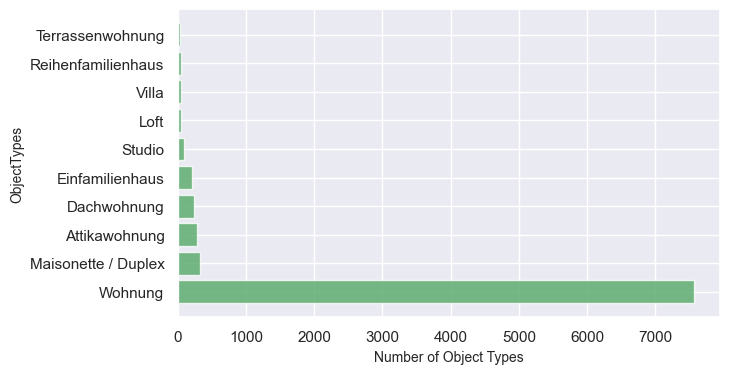

In [297]:
# Barchart top 10 ObjectTypes
#Group data by ObjectType (only the topmost 10 values are shown)
df_bar_property = df_filtered_property_location_clean['ObjectType'].value_counts().nlargest(10).sort_values(ascending=False)

# Values for barchart
napart = list(df_bar_property.values)
index = list(df_bar_property.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of Object Types', fontsize=10)
ax.set_ylabel('ObjectTypes', fontsize=10)

# Show graph
plt.show()

<Axes: xlabel='SquareMeter'>

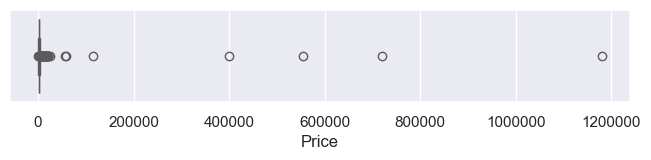

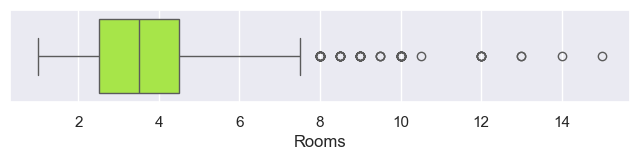

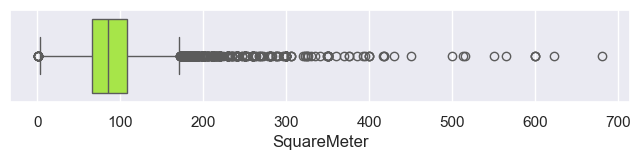

In [364]:
#Boxplots for Outliers of Prices, Rooms and SquareMeters
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_continuous['Price'], color="greenyellow")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_continuous['Rooms'], color="greenyellow")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_continuous['SquareMeter'], color="greenyellow")

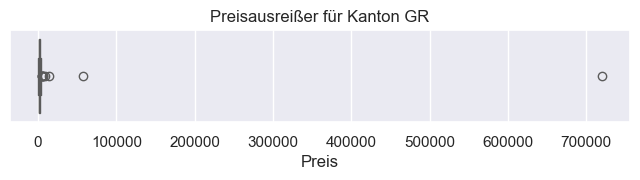

In [365]:
#Show outlier for specific canton
df_gr = df_filtered_property_location_clean[df_filtered_property_location_clean['Canton'] == 'gr']
plt.figure(figsize=(8, 1.2))
plt.ticklabel_format(style='plain')  # Stellt sicher, dass die Preise im normalen Zahlenformat angezeigt werden
sns.boxplot(x=df_gr['Price'], color="greenyellow")  # Erstellen des Boxplots mit der angegebenen Farbe

plt.title('Preisausreisser für Kanton GR')  # Hinzufügen eines Titels zum Plot
plt.xlabel('Preis')  # Beschriftung der X-Achse
plt.show()

In [369]:
#show specific outlier for specific canton
# Filtering the DataFrame to only include data for the canton 'gr'
df_gr = df_filtered_property_location_clean[df_filtered_property_location_clean['Canton'] == 'gr']

# Calculating the first (Q1) and third quartiles (Q3)
Q1 = df_gr['Price'].quantile(0.25)
Q3 = df_gr['Price'].quantile(0.75)
IQR = Q3 - Q1

# Defining the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = df_gr[(df_gr['Price'] < lower_bound) | (df_gr['Price'] > upper_bound)]

# Displaying the ListingsId of the outliers
outliers_listing_ids = outliers['ListingId']
print(outliers_listing_ids)


842     4000785336
846     4000702689
1483    4000785338
1494    4000924121
1498    4000724258
1525    4000785337
1550    4000950371
7401    4000637298
7412    4000956535
Name: ListingId, dtype: object


In [ ]:
#DOING: Outliers pro Kanton bereinigen? Falls ja dann in Code-Snippet in EDA rübernehmen

# Data Cleansing for PropertyAdditionalFeatures

In [268]:
#Connection
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM PropertyAdditionalFeatures"
df_data_PropertyAdditionalFeatures = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]

cnxn.close()

In [269]:
#Show header of table
df_data_PropertyAdditionalFeatures.head()

,ListingId,Feature
0,044f5ac4-3a33-436e-a004-09a0a6855fbf,Kinderfreundlich
1,044f5ac4-3a33-436e-a004-09a0a6855fbf,Parkplatz
2,b30f81ac-a527-4996-9d69-2522870131c6,Haustiere erlaubt
3,b30f81ac-a527-4996-9d69-2522870131c6,Balkon / Terrasse
4,b30f81ac-a527-4996-9d69-2522870131c6,Kabel-TV


In [271]:
# Check for duplicates - no duplicates found
df_data_PropertyAdditionalFeatures.duplicated()
df_data_PropertyAdditionalFeatures.duplicated().sum()

0

In [272]:
# Check for empty entries - no empty entries found
df_data_PropertyAdditionalFeatures.isnull().sum()

ListingId    0
Feature      0
dtype: int64